# Data Description & Exploratory Data Analysis and Visualization

In [49]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)

### Introduction

For our project, we are focusing on the Employee dataset from Kaggle. This dataset contains anonymized information about employees at a company, with 9 variables related to various characteristics of the employees. 

Our main question is: "What factors predict whether an employee will leave the company?" We are particularly interested in identifying the key variables that significantly influence an employee’s decision to leave the company. Specifically, we want to explore:

- How the **years of experience**, **educational background**, and **age** relate to **employee retention**.
- Whether factors such as **gender**, **payment tier**, or **being benched** have any significant effect on an employee's likelihood to **stay or leave**.

### 1.Data Description:Employee dataset

(a)Overview 

The dataset for our group is the Employee dataset on Kaggle, which contains the
anonymized information about employees at a company. It has 9 variables, including
the employee’s educational background, joining year, city, payment tier, age, gender,
whether they have ever been “benched” (not assigned work for a period of time), years
of experience in their field, and whether they have left the company.

(b)Varibles
There are 4653 observations being collected and 9 variables in this dataset.

`Education`: Employee's Educational Background(categorical variable)

`JoiningYear`: The year that employee join the company(numeric variable)

`City`: City where each employee is located(categorical variable)

`PaymentTier`: The level of payment that employee has(categorical variable)

`Age`: The age of employee(numeric variable)

`Gender`: The Gender of employee(categorical variable)

`EverBenched`: Whether employee be benched or not(categorical variable)

`ExperienceInCurrentDomain`: Years of Experience in Current Domain (numeric variable)

`LeaveOrNot`: employee retention (numeric variable)

(c)collectig 

Our main question is: "What factors predict whether an employee will leave the company?" 
specifically, we want to explore:

- How the **years of experience**, **educational background**, and **age** relate to **employee retention**.
- Whether factors such as **gender**, **payment tier**, or **being benched** have any significant effect on an employee's likelihood to **stay or leave**.

So we choose the variables:

`Education`: Employee's Educational Background(categorical variable)

`PaymentTier`: The level of payment that employee has(categorical variable)

`Age`: The age of employee(numeric variable)

`Gender`: The Gender of employee(categorical variable)

`EverBenched`: Whether employee be benched or not(categorical variable)

`ExperienceInCurrentDomain`: Years of Experience in Current Domain (numeric variable)

`LeaveOrNot`: employee retention (numeric variable and response variable)

(d)Source:

The dataset for our group is the Employee dataset on Kaggle, which contains the
anonymized information about employees at a company


Here is the link to dataset:https://www.kaggle.com/datasets/tawfikelmetwally/employee-datasetLinks to an external site.

In [99]:
head(read_csv("data/Employee.csv"))

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [100]:
employee_data <- 
    read_csv("data/Employee.csv") %>%
    select(Education,ExperienceInCurrentDomain,PaymentTier,EverBenched,Age,Gender,LeaveOrNot)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [101]:
nrow(employee_data)

[1] 4653

In [102]:
head(employee_data)

Education,ExperienceInCurrentDomain,PaymentTier,EverBenched,Age,Gender,LeaveOrNot
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Bachelors,0,3,No,34,Male,0
Bachelors,3,1,No,28,Female,1
Bachelors,2,3,No,38,Female,0
Masters,5,3,No,27,Male,1
Masters,2,3,Yes,24,Male,1
Bachelors,0,3,No,22,Male,0


### 2.Question:

- How the **years of experience**, **educational background**, and **age** relate to **employee retention**.

  This question hightlights both prediction and inference.
  
- Whether factors such as **gender**, **payment tier**, or **being benched** have any significant effect on an employee's likelihood to **stay or leave**.

  This question hightlights inference.

The dataset includes information on employees' educational background, age, years of experience, and other factors. We can employ some predicting method to analyze the relationship between these variables and employee dimission and identify the key factors that influence whether an employee stays or leaves the company.



### 3.Exploratory Data Analysis and Visualization

The plots we illustrated list all the factors and their relationship with employee retention.We use boxplot to present relationship between numeric variable(factor) and categorical variable(response) and use bar to present relationship between categorical variable(factor) and categorical variable(response)

Through these plots, we can obtain a clearer understanding of the reasons why employees leave, and how different factors influence employees' decisions to stay or leave.

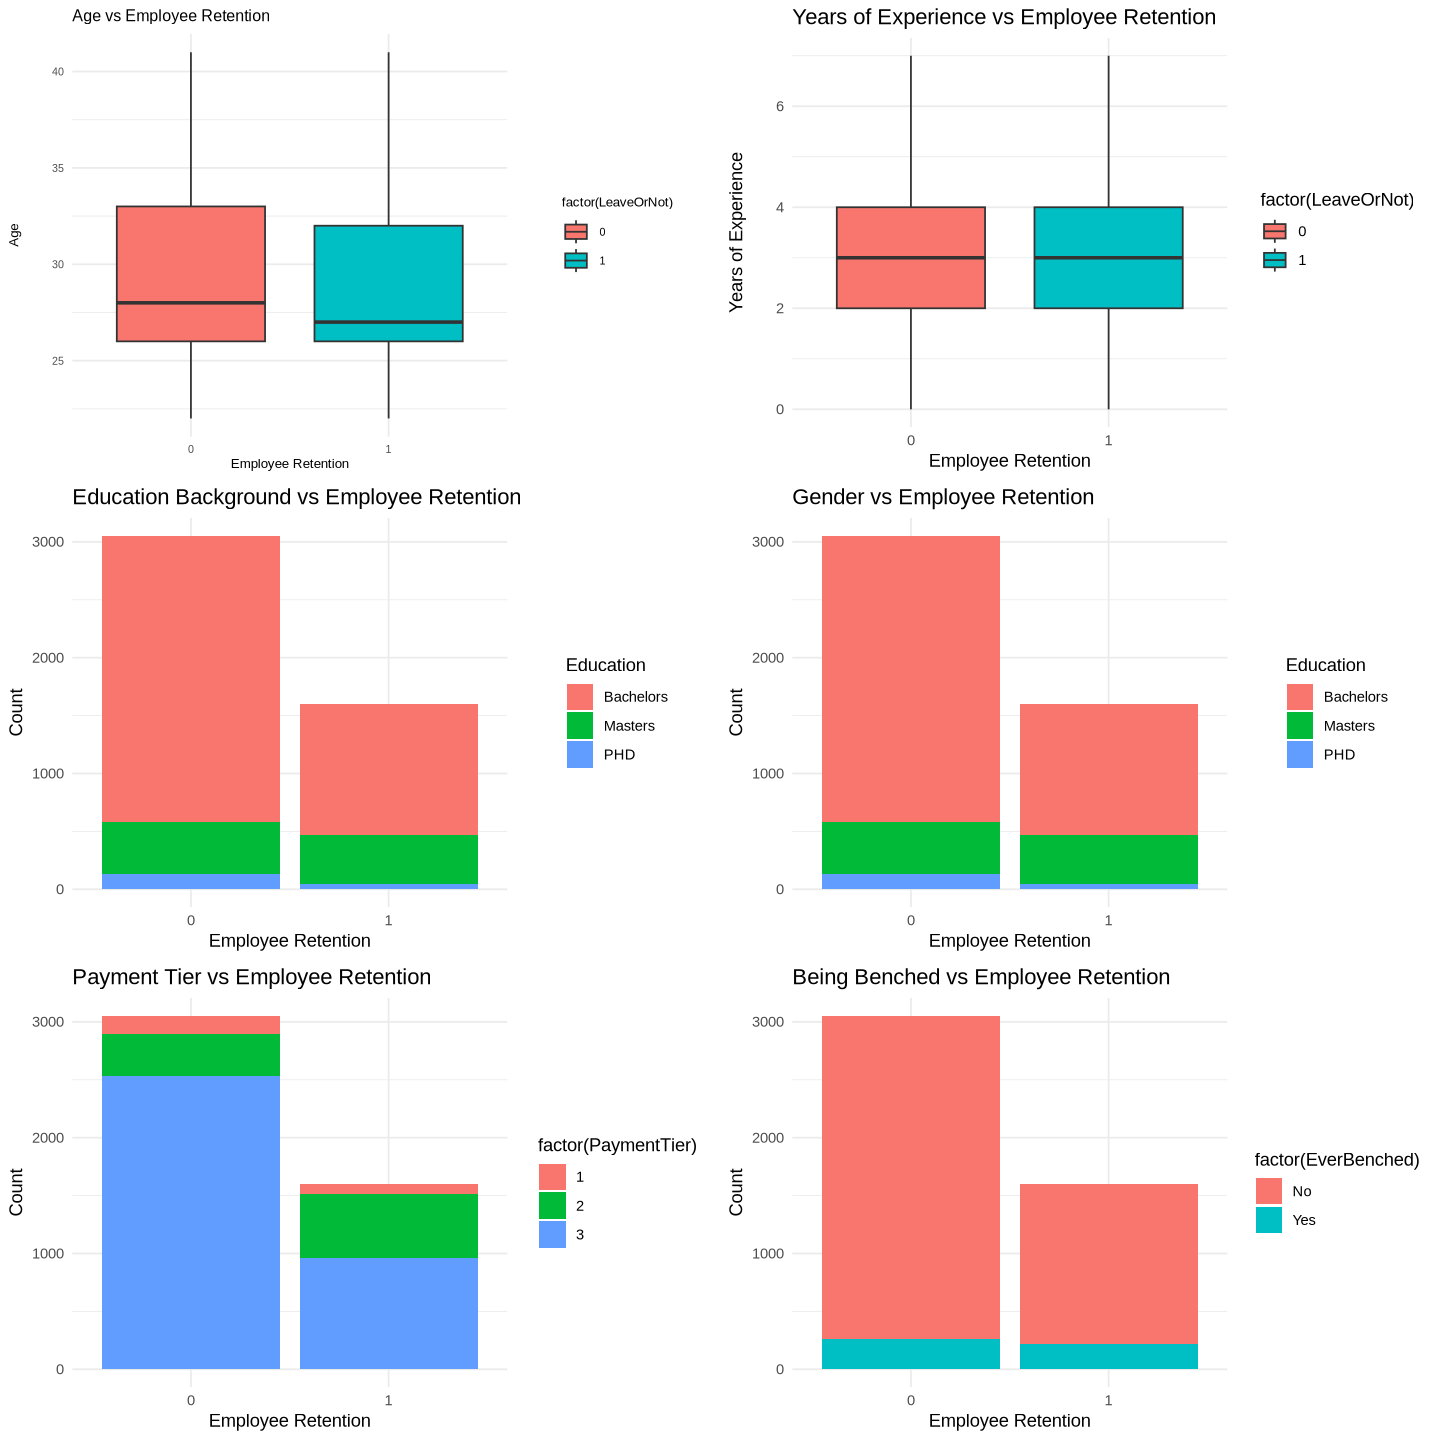

In [104]:
# Boxplot for Age vs LeaveOrNot


boxplot_AgevsLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), y = Age, fill = factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Age vs Employee Retention", x = "Employee Retention", y = "Age") +
  theme_minimal()+theme(text = element_text(size = 8))


# Boxplot for Years of Experience vs LeaveOrNot
boxplot_YearsofExperiencevsLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), y = ExperienceInCurrentDomain, fill = factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Years of Experience vs Employee Retention", x = "Employee Retention", y = "Years of Experience") +
  theme_minimal()
# Bar for Educational Background vs LeaveOrNot
bar_EducationvsLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), fill = Education)) +
  geom_bar() +  
  labs(title = "Education Background vs Employee Retention", x = "Employee Retention", y = "Count") +
  theme_minimal()
# Bar for Gender vs LeaveOrNot
bar_GendervsLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), fill = Education)) +
  geom_bar() + 
  labs(title = "Gender vs Employee Retention", x = "Employee Retention", y = "Count") +
  theme_minimal()
# Bar for Payment Tier vs LeaveOrNot
bar_PaymentTierLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), fill = factor(PaymentTier))) +
  geom_bar() +  
  labs(title = "Payment Tier vs Employee Retention", x = "Employee Retention", y = "Count") +
  theme_minimal()
# Bar for Being Benched vs LeaveOrNot
bar_BenchedLeaveOrNot<-
  employee_data|>
  ggplot(aes(x = factor(LeaveOrNot), fill = factor(EverBenched))) +
  geom_bar() +  
  labs(title = "Being Benched vs Employee Retention", x = "Employee Retention", y = "Count") +
  theme_minimal()

options(repr.plot.width = 12, repr.plot.height = 12) 
plot_grid(
  boxplot_AgevsLeaveOrNot, 
  boxplot_YearsofExperiencevsLeaveOrNot, 
  bar_EducationvsLeaveOrNot, 
  bar_GendervsLeaveOrNot, 
  bar_PaymentTierLeaveOrNot, 
  bar_BenchedLeaveOrNot, 
  ncol = 2,  
  align = "v",
  rel_widths = c(1, 1, 1)  
)